In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
os.chdir("/Users/healer/Downloads/Kaggle Price Suggestion/unarchieved data")

In [3]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [140]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
general_cat           object
subcat_1              object
subcat_2              object
dtype: object

In [5]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [118]:
#target variable: price
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.87030000e+04,   0.00000000e+00,
          1.61390000e+04,   3.15020000e+04,   3.22930000e+04,
          5.22840000e+04,   6.15980000e+04,   6.36630000e+04,
          1.39257000e+05,   7.90330000e+04,   1.13472000e+05,
          1.45848000e+05,   1.35316000e+05,   7.07500000e+04,
          1.16958000e+05,   7.95220000e+04,   6.89950000e+04,
          5.18980000e+04,   4.50770000e+04,   3.99980000e+04,
          3.01660000e+04,   2.00750000e+04,   1.79610000e+04,
          1.10780000e+04,   1.03920000e+04,   7.75400000e+03,
          5.79600000e+03,   4.55000000e+03,   3.45100000e+03,
          2.44200000e+03,   1.47600000e+03,   1.37600000e+03,
          9.30000000e+02,   6.15000000e+02,   3.47000000e+02,
          2.84000000e+02,   2.18000000e+02,   1.64000000e+02,
          1.00000000e+02,   7.20000000e+01,   4.00000000e+01,
        

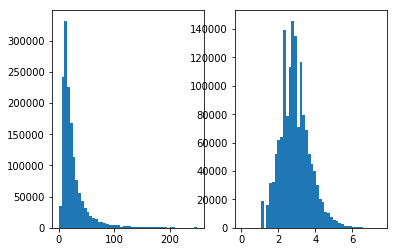

In [45]:
plt.subplot(1, 2, 1)
plt.hist(train['price'],bins=50,range=(0,250))
plt.subplot(1,2,2)
plt.hist(np.log(train['price']),bins=50,range=(0,7.5))

In [40]:
train['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

In [47]:
train['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

In [50]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [53]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [54]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [61]:
print("There are %d unique general categories." %train['general_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

There are 11 unique general categories.
There are 114 unique first sub-categories.
There are 871 unique second sub-categories.


In [79]:
x = train['general_cat'].value_counts().index.values.astype('str')
y = train['general_cat'].value_counts().values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))]

In [80]:
trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of Items by Main Category',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Category'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [166]:
df = pd.DataFrame(train, columns = ('general_cat','price'))
print(df['general_cat'].counts)

AttributeError: 'Series' object has no attribute 'counts'

In [74]:
x = train['subcat_1'].value_counts().index.values.astype('str')[:15]
y = train['subcat_1'].value_counts().values[:15]
pct = [("%.2f"%(v*100))+"%"for v in (y/len(train))][:15]

In [78]:
trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of Items by Main Category',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Category'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [177]:
d = {k: v.drop("general_cat", axis=1) for k,v in list(df.groupby("general_cat"))}

In [172]:
print(d.get('Women'))

         price
2         10.0
4         44.0
5         59.0
6         64.0
12        16.0
14        43.0
19        27.0
20        13.0
21        20.0
24        10.0
27        24.0
28         5.0
29        16.0
31        50.0
32        22.0
35        13.0
36       209.0
39        10.0
41        13.0
45        51.0
47        21.0
48        54.0
50       114.0
53         7.0
60       119.0
61        50.0
62        12.0
63        12.0
66        15.0
67        16.0
...        ...
1482456   50.0
1482458   11.0
1482459   10.0
1482461   45.0
1482467   30.0
1482468   14.0
1482472   33.0
1482475   33.0
1482479    8.0
1482482   31.0
1482485   17.0
1482487   31.0
1482491    5.0
1482492   15.0
1482497   14.0
1482500    8.0
1482503   19.0
1482505   34.0
1482508   21.0
1482512   34.0
1482515   20.0
1482517   11.0
1482519    9.0
1482524   26.0
1482525    7.0
1482526   12.0
1482527   10.0
1482528   18.0
1482530   20.0
1482534   22.0

[664385 rows x 1 columns]


NameError: name 'drop' is not defined